<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/02_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression With Tensorflow**

| Hyperparameter | Typical Values |
|---|---|
| **Input Layer Shape** | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction |
| Hidden Layers | Problem specific, minimum=1, maximum=unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually `ReLU`(rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss Function | `MSE`(mean squared error) or `MAE`(mean absolute error)/`Huber`(combination of MAE/MSE) if outliers |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` |



# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, evern shorter.... predicting a number

In [1]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


## Creating data to view and fit

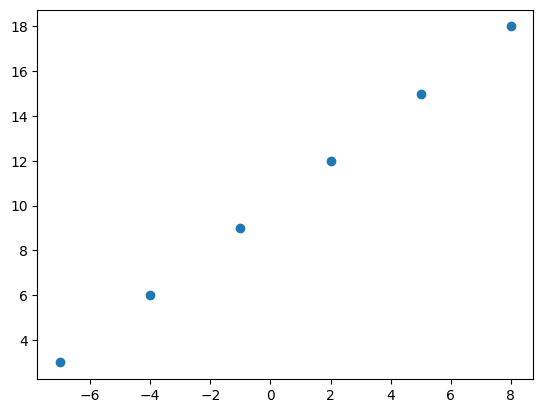

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18.])

In [4]:
y == X + 10  # This is the relationship between our dependent variable(y) and independent variable(x)

array([ True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant(654332)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=654332>)

##### From this above house price cell we know about the shapes of both features and labels. Here `house_info` is our feature deriving the `house_price` which is our label our output we can say.

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((6,), (6,))

In [7]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

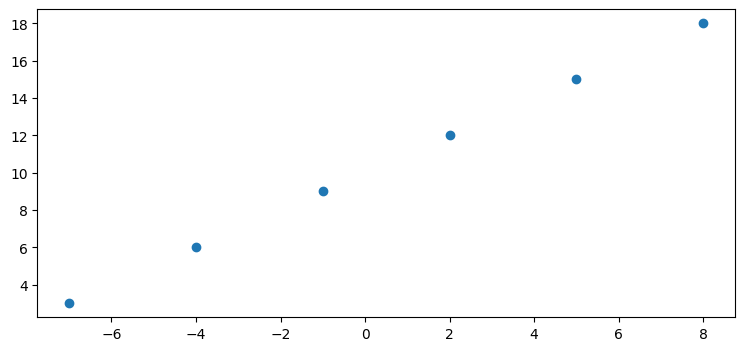

In [10]:
plt.figure(figsize=(9,4))
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the functio which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)


In [11]:
# set random_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - loss: 10.4738 - mae: 10.4738
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 10.4613 - mae: 10.4613
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.4488 - mae: 10.4488
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.4363 - mae: 10.4363
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.4238 - mae: 10.4238


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([11.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.9011548]], dtype=float32)

## Improving our model

As we can above that from the above pattern at [11.0] our model predicted value should be 21....  but it is not giving exactly what we want.
Hence, it's time to improve our model.


We can improve our model, by altering the steps we took to create a model.

1. `Creating a model` - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. `Compiling a model` - here we might change the optimzation function or perhaps the **learning rate** of the optimzation function.
3. `Fitting a model` - here we might fit a model for more **epochs** (leave it training for lomger) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the mode (this time we'll train for the longer time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 10.3128 - mae: 10.3128
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.3003 - mae: 10.3003
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.2878 - mae: 10.2878
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.2753 - mae: 10.2753
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.2628 - mae: 10.2628
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.2503 - mae: 10.2503
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.2378 - mae: 10.2378
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.2253 - mae: 10.2253
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.2128 - mae: 10.2128
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.2003 - mae: 10.2003
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.1878 - mae: 10.1878
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.1753 - mae: 10.1753
Epoch 13/100
1/1 ━━━━━━━

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [16]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([11.0]))  # Now we should get output close to 21

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[10.619163]], dtype=float32)

In [17]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y , epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step - loss: 10.9145 - mae: 10.9145
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 10.6828 - mae: 10.6828
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.4515 - mae: 10.4515
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.2206 - mae: 10.2206
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.9911 - mae: 9.9911
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.7603 - mae: 9.7603
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.5271 - mae: 9.5271
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.2941 - mae: 9.2941
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.0605 - mae: 9.0605
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.8236 - mae: 8.8236
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5834 - mae: 8.5834
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3405 - mae: 8.3405
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [18]:
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [19]:
# Let's predict now
model.predict(tf.constant([11.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[24.80878]], dtype=float32)

## Evaluating a model